In [210]:
import pandas as pd
import numpy as np

In [211]:
data = "/Users/leona/OneDrive/Documentos/GitHub/Machine-learning-studies-2/ensemble/baggin/exercise/Concrete_Data.xls"

In [212]:
df = pd.read_excel(data, engine='xlrd')

In [213]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [214]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [215]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [216]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

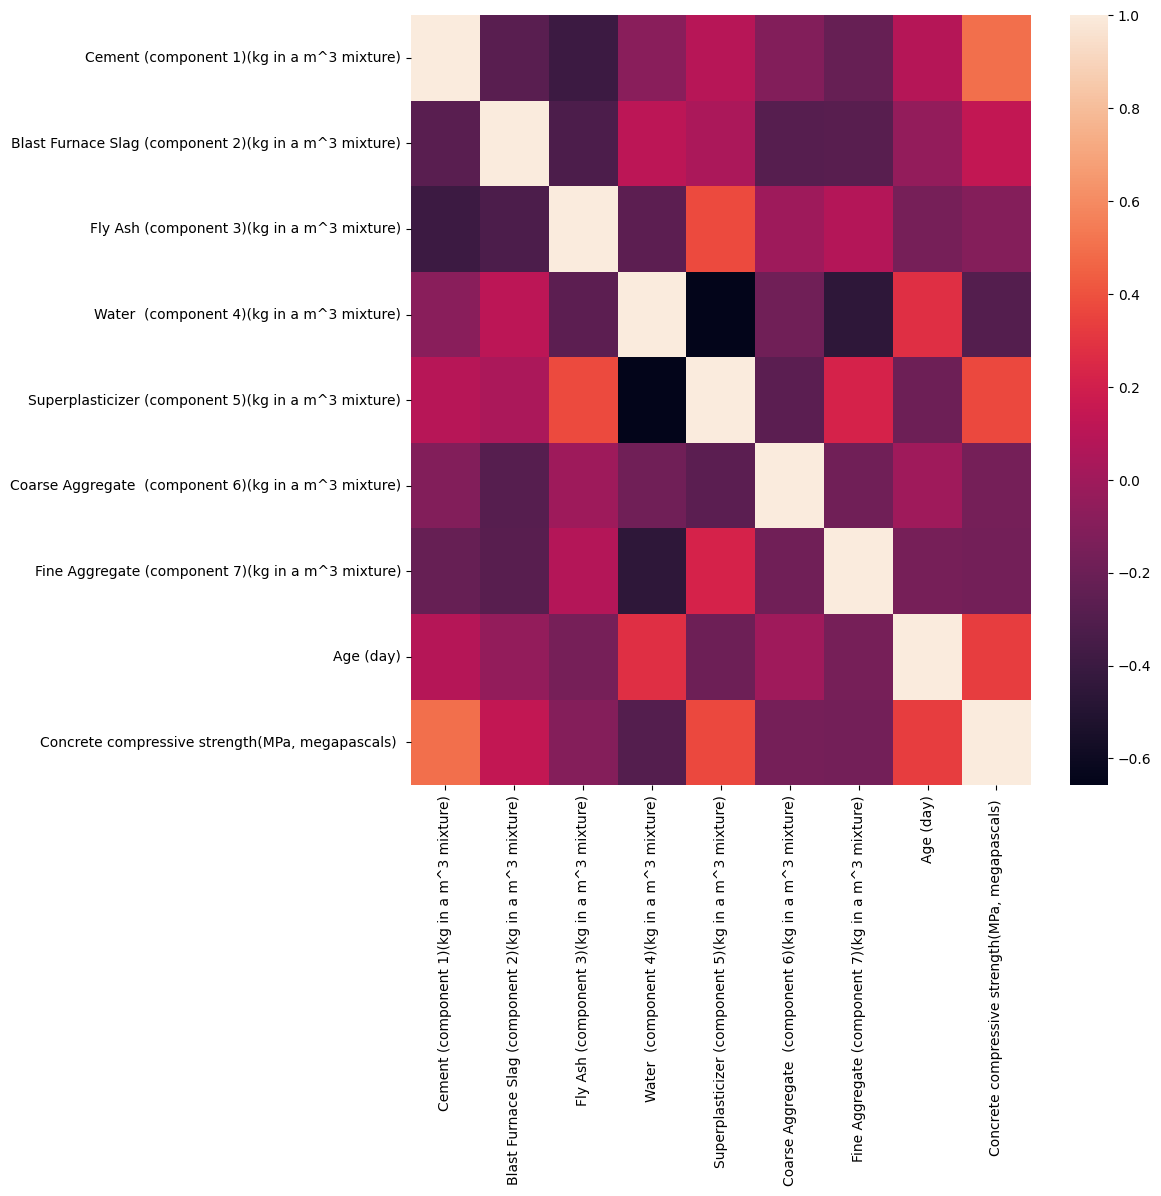

In [218]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
plt.show()

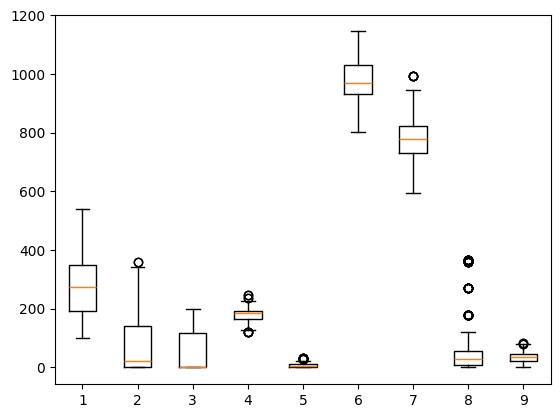

In [219]:
plt.boxplot(df)
plt.show()

In [220]:
df.shape

(1030, 9)

In [221]:
x = df.drop(columns=["Concrete compressive strength(MPa, megapascals) "], axis=1)
y = df["Concrete compressive strength(MPa, megapascals) "]

In [222]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [223]:
fold = KFold(n_splits=5, shuffle=True, random_state=15)

In [224]:
model = BaggingRegressor(n_estimators=100, max_samples=0.5, n_jobs=-1)
result = cross_val_score(model, x, y, cv=fold, n_jobs=-1)

print(f'The score of this model was: {result.mean()}')

The score of this model was: 0.8959862913181451


In [225]:
grid_param = {
    "estimator": [KNeighborsRegressor(), LinearRegression(), None],
    "max_samples": np.array([0.2, 0.5, 0.7])
}

In [226]:
model = BaggingRegressor(n_estimators=100, n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=grid_param, cv=fold, n_jobs=-1)
grid.fit(x, y)

print(f'The best score of this model was: {grid.best_score_}. With the best params: {grid.best_params_}')

The best score of this model was: 0.9035823435947694. With the best params: {'estimator': None, 'max_samples': 0.7}


In [227]:
model = BaggingRegressor(n_estimators=100, n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=grid_param, cv=fold, scoring="neg_mean_absolute_error", n_jobs=-1)
grid.fit(x, y)

print(f'The best score of this model was: {grid.best_score_}. With the best params: {grid.best_params_}')

The best score of this model was: -3.6105220608329267. With the best params: {'estimator': None, 'max_samples': 0.7}
